## 1.1. Import Data and Required Packages

### Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Library


In [40]:
# Basic Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Modelling
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

### Import the CSV Data as Pandas DataFrame

In [41]:
df = pd.read_csv('data/stud.csv')

In [42]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Preparing X and Y Variables

In [43]:
X = df.drop(columns=['math_score'], axis=1)

In [44]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [45]:
print("Categories in 'gender' variable:   ",end=" ")
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:   ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in 'parental_level_of_education' variable:   ",end=" ")
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:   ",end=" ")
print(df['lunch'].unique())

print("Categories in 'test_preparation_course' variable:   ",end=" ")
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:    ['female' 'male']
Categories in 'race_ethnicity' variable:    ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable:    ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:    ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable:    ['none' 'completed']


In [46]:
y = df['math_score']

In [47]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

### Create Column Tranformer with 3 types of transformer

In [48]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

numerical_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessing = ColumnTransformer(
    transformers=[
        ('OneHotEncoder', oh_transformer, cat_features),      # Use OneHotEncoder for categorical features
        ('StandardScaler', numerical_transformer, num_features) # Use StandardScaler for numerical features
    ],
)

In [49]:

X = preprocessing.fit_transform(X)

In [50]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]], shape=(1000, 19))

In [51]:
X.shape

(1000, 19)

### Separate Dataset into Train and Test

In [52]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 19), (200, 19), (800,), (200,))

### Create an Evaluate Function to Give all Metrics after Model Training

In [55]:
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2 = r2_score(true, predicted)
    return mae, mse, rmse, r2

In [60]:
models = {
    'LinearRegression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'K-Neighbors Regressor': KNeighborsRegressor(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'XGB Regressor': XGBRegressor(),
    'CatBoost Regressor': CatBoostRegressor(),
    'AdaBoost Regression': AdaBoostRegressor()
}
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train) # Train model

    # Make Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train,y_train_pred)
    model_test_mae, model_test_rmse, model_test_mse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    # print(list(models.keys())[i])
    # model_list.append(list(models.keys())[i])

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    r2_list.append(model_test_r2) 

    print('Model Performance for Training Set')
    print("- Root Mean Sqaured Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:4f}".format(model_train_mae))
    print("- R2 Score: {: 4f}".format(model_train_r2))

    print('.'*35)

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:4f}".format(model_test_rmse))
    print('- Mean Absolute Error: {:4f}'.format(model_test_mae))
    print("- R2 Score: {:4f}".format(model_test_r2))
    

    print('='*35)
    print('\n')

LinearRegression
Model Performance for Training Set
- Root Mean Sqaured Error: 5.3231
- Mean Absolute Error: 4.266712
- R2 Score:  0.874317
...................................
Model performance for Test set
- Root Mean Squared Error: 29.095170
- Mean Absolute Error: 4.214763
- R2 Score: 0.880433


Lasso
Model Performance for Training Set
- Root Mean Sqaured Error: 6.5938
- Mean Absolute Error: 5.206303
- R2 Score:  0.807146
...................................
Model performance for Test set
- Root Mean Squared Error: 42.506417
- Mean Absolute Error: 5.157882
- R2 Score: 0.825320


Ridge
Model Performance for Training Set
- Root Mean Sqaured Error: 5.3233
- Mean Absolute Error: 4.264988
- R2 Score:  0.874304
...................................
Model performance for Test set
- Root Mean Squared Error: 29.056272
- Mean Absolute Error: 4.211101
- R2 Score: 0.880593


K-Neighbors Regressor
Model Performance for Training Set
- Root Mean Sqaured Error: 5.7091
- Mean Absolute Error: 4.517500
- 

## Results

In [61]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=["Modle Name", "R2_Score"]).sort_values(by=["R2_Score"], ascending=False)

,Modle Name,R2_Score
2,Ridge,0.880593
0,LinearRegression,0.880433
7,CatBoost Regressor,0.851632
5,Random Forest Regressor,0.851102
8,AdaBoost Regression,0.847323
6,XGB Regressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783497
4,Decision Tree Regressor,0.720821


## Linear Regression

In [62]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print("Accuracy of the Modelis %.2f" %score)

Accuracy of the Modelis 88.04


## Plot y_pred and y_test

Text(0, 0.5, 'Prediction')

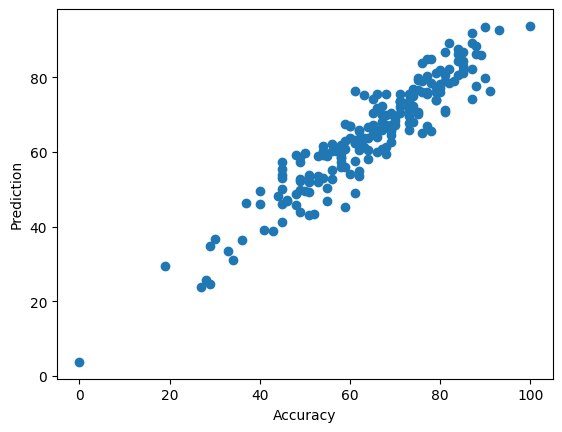

In [63]:
plt.scatter(y_test, y_pred)
plt.xlabel('Accuracy')
plt.ylabel('Prediction')

<Axes: xlabel='math_score'>

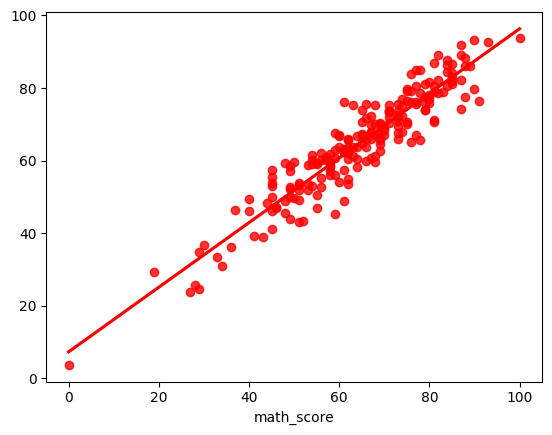

In [66]:
sns.regplot(x=y_test, y= y_pred, ci=None, color='red')

## Difference Between Actual and Predicted Values

In [67]:
pred_df = pd.DataFrame({"Actual Values":y_test, "Predicted Value":y_pred, "Difference":y_test-y_pred})
pred_df

,Actual Values,Predicted Value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
